In [1]:
import numpy as np
import scipy
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# Import NSDI data
frankData = pd.read_csv("/home/geory/git/Frankenstein/Frankenstein/Working/Data/Amplitudes/Ar_800nm_1e14W.inp_Range_401X200_channel:0.outamps", sep = ' ')
entries = frankData.shape[0]
frankData

,Ppar,Pper,Are,Aim
0,0.000010,3.141593e-09,6.352095e-06,-1.495780e-05
1,0.015085,4.739195e-06,5.600951e-06,-1.476190e-05
2,0.030161,9.475249e-06,4.902366e-06,-1.452993e-05
3,0.045236,1.421130e-05,4.255642e-06,-1.426741e-05
4,0.060311,1.894736e-05,3.659709e-06,-1.397941e-05
...,...,...,...,...
80195,2.939699,-9.235336e-04,3.739040e-10,1.237935e-10
80196,2.954774,-9.282696e-04,3.093216e-10,1.927791e-10
80197,2.969849,-9.330057e-04,2.358303e-10,2.409973e-10
80198,2.984925,-9.377417e-04,1.588216e-10,2.683806e-10


In [3]:
# Get real and imaginary parts of amplitude, construct total amplitude
reals = frankData['Are'].tolist()
ims = frankData['Aim'].tolist()

norms = np.empty(entries, dtype=np.float64)
for i in np.arange(entries):
    norms[i] = (reals[i]**2 + ims[i]**2)

In [4]:
# Setup for sample points to interpolate
imin = jmin = -2.0
imax = jmax = 2
inum = jnum = 200
istep = jstep = (imax-imin)/inum

In [5]:
# Data points from NSDI
################################################################################
##########         Remember to set total number of data points        ##########
################################################################################


points = []
for i in np.arange(80200):
    points.append([frankData['Ppar'][i], frankData['Pper'][i]])
    
points = np.array(points)

# Sample pints to interpolate
targets = []

for i in np.arange(inum+1):
    for j in np.arange(jnum+1):
        targets.append([imin + i*istep, jmin + j*jstep])

targets = np.array(targets)

In [6]:
# Interpolate values at target points, based on the values of NSDI input points
# Returns an array of values at the target points
interNorms = scipy.interpolate.griddata(points=points, values=norms, xi=targets)

# Reconstruct grid with target coordinates and amplitude values
amps = np.empty_like(interNorms, dtype = np.ndarray)

for i in np.arange((inum+1)*(jnum+1)):
    elem = np.append(targets[i], interNorms[i])
    amps[i] = elem

# Resolve clusterfuckery between Python lists and NumPy ndarrays (result will be an ndarray)
amps = amps.tolist()

for i in np.arange(len(amps)):
    amps[i] = amps[i].tolist()
    
amps = np.array(amps)
ampsT = np.transpose(amps)

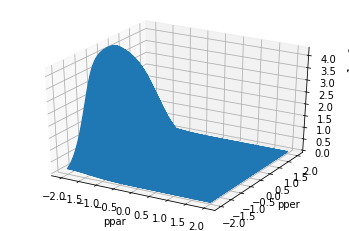

In [7]:
# Plot amplitudes
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(ampsT[0],ampsT[1],ampsT[2]);
plt.xlabel('ppar');
plt.ylabel('pper');

In [8]:
# Integrate perpendicular momenta
pparAmps = []

for i in np.arange(inum+1):
    temp = 0
    for j in np.arange(jnum+1):
        temp += amps[i*(inum+1) + j, 2]*jstep
    
    pparAmps.append([amps[i*(jnum+1),0], temp])

pparAmps = np.array(pparAmps)

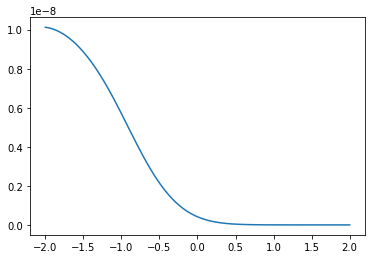

In [9]:
plt.plot(np.transpose(pparAmps)[0], np.transpose(pparAmps)[1])

# e2

In [10]:
# Import Orbit 1 from CQSFA
e2data = pd.read_csv("/home/geory/git/Frankenstein/Frankenstein/Working/Amplitudes_Orb1_Cycle1_Ar_052_800_1e14_360X200.dat", sep = ' ')
e2data

,Ppar,Pper,Mre,Mim,P,Mprefre,Mprefim,Ppref
0,0.000010,3.141590e-09,-1.626920e-01,7.281320e-02,3.177030e-02,-4.007100e-03,-1.849980e-01,3.424020e-02
1,0.015085,4.739200e-06,-1.520010e-01,9.207390e-02,3.158190e-02,-2.284640e-02,-1.591990e-01,2.586630e-02
2,0.030161,9.475250e-06,-5.012600e-03,1.762640e-01,3.109410e-02,-1.353560e-01,-6.272510e-02,2.225570e-02
3,0.045236,1.421130e-05,1.013610e-01,1.428680e-01,3.068520e-02,-1.400910e-01,2.950920e-02,2.049630e-02
4,0.060311,1.894740e-05,2.744190e-02,-1.722410e-01,3.042000e-02,1.178760e-01,7.587210e-02,1.965120e-02
...,...,...,...,...,...,...,...,...
143995,-0.000924,2.939700e+00,-5.012970e-55,4.562390e-55,4.594530e-109,3.940940e-53,4.377040e-53,3.468950e-105
143996,-0.000928,2.954770e+00,2.431940e-56,-1.427780e-55,2.097690e-110,-1.265950e-53,-2.225280e-54,1.652150e-106
143997,-0.000933,2.969850e+00,2.729200e-56,1.767560e-56,1.057280e-111,1.615160e-54,-2.465570e-54,8.687780e-108
143998,-0.000938,2.984920e+00,-3.262540e-57,6.260840e-57,4.984230e-113,5.778510e-55,3.049190e-55,4.268870e-109


In [11]:
#CQSFA grid is not symmetric, only has one half of of ppar points

parmin = -2.0
parmax = 2.0
parnum = 200

permin = 0.04
permax = 2.0
pernum = 98

parstep = (parmax-parmin)/parnum
perstep = (permax-permin)/pernum

In [12]:
# Sample points and inpterpolation targets
################################################################################
##########         Remember to set total number of data points        ##########
################################################################################

pointse2 = []
for i in np.arange(144000):
    pointse2.append([e2data['Ppar'][i], e2data['Pper'][i]])
    
pointse2 = np.array(pointse2)

targetse2 = []

for i in np.arange(parnum+1):
    for j in np.arange(pernum+1):
        targetse2.append([parmin + i*parstep, permin + j*perstep])

targetse2 = np.array(targetse2)


In [13]:
# Calculate amplitudes from Real and Imaginary components
e2reals = e2data['Mre'].tolist()
e2ims = e2data['Mim'].tolist()
e2amps = np.empty_like(e2reals, dtype=np.float64)

for i in np.arange(len(e2reals)):
    e2amps[i] = (e2reals[i]**2 + e2ims[i]**2)

In [14]:
# Interpolation on CQSFA results
interpe2 = scipy.interpolate.griddata(points=pointse2, values=e2amps, xi=targetse2, method='linear')

In [15]:
# List-Array monkey bussiness
interpArraye2 = np.empty_like(interpe2, dtype = np.ndarray)

for i in np.arange((parnum+1)*(pernum+1)):
    elem = np.append(targetse2[i], interpe2[i])
    interpArraye2[i] = elem
    
interpArraye2 = interpArraye2.tolist()

for i in np.arange(len(interpArraye2)):
    interpArraye2[i] = interpArraye2[i].tolist()
    
interpArraye2 = np.array(interpArraye2)
transe2 = np.transpose(interpArraye2)

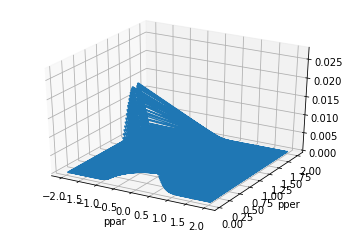

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(transe2[0],transe2[1],transe2[2]);
plt.xlabel('ppar');
plt.ylabel('pper');

In [17]:
# Integrate perpendicular components
pparAmpse2 = []

for i in np.arange(parnum+1):
    temp = 0
    for j in np.arange(pernum+1):
        temp += interpArraye2[i*(pernum+1) + j, 2]*perstep
    
    pparAmpse2.append([interpArraye2[i*(pernum+1),0], temp])

pparAmpse2 = np.array(pparAmpse2)

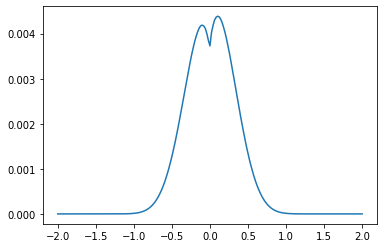

In [18]:
plt.plot(np.transpose(pparAmpse2)[0], np.transpose(pparAmpse2)[1])

In [19]:
# Construct grid of total amplitudes as a function of ppar1 and ppar2
ampGrid = np.empty((pparAmps.shape[0], pparAmpse2.shape[0]), dtype = np.ndarray)

for par1 in np.arange(pparAmps.shape[0]):
    for par2 in np.arange(pparAmpse2.shape[0]):
        ampGrid[par1, par2] = np.array([pparAmps[par1,0], pparAmpse2[par2,0], pparAmps[par1,1]*pparAmpse2[par2,1]])

In [20]:
listg = ampGrid.tolist()

for i in np.arange(len(listg)):
    for j in np.arange(len(listg[0])):
        listg[i][j] = listg[i][j].tolist()
        
grid = np.array(listg)

finalAmps = grid[0]

for i in np.arange(grid.shape[0]):
    if(i != 0):
        finalAmps = np.append(finalAmps, grid[i], axis=0)

In [21]:
finalAmps

array([[-2.00000000e+00, -2.00000000e+00,  5.19351923e-26],
       [-2.00000000e+00, -1.98000000e+00,  1.33450848e-25],
       [-2.00000000e+00, -1.96000000e+00,  3.27901394e-25],
       ...,
       [ 2.00000000e+00,  1.96000000e+00,  3.76138613e-32],
       [ 2.00000000e+00,  1.98000000e+00,  1.52890753e-32],
       [ 2.00000000e+00,  2.00000000e+00,  5.95681092e-33]])

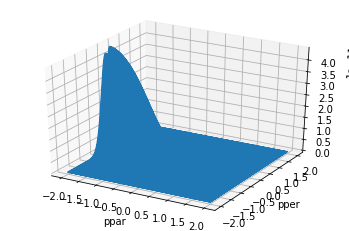

In [22]:
p1 = np.transpose(finalAmps)[0]
p2 = np.transpose(finalAmps)[1]
val = np.transpose(finalAmps)[2]

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(p1,p2,val);
plt.xlabel('ppar');
plt.ylabel('pper');

In [23]:
# Save result to text file to plot with Mathematica
# Puts file in parent folder of notebook

np.savetxt('HiRes_Frank_orb1.txt', finalAmps)

In [24]:
#Symmetrising

sym = np.copy(finalAmps)

for i in np.arange(parnum+1):
    for j in np.arange(parnum+1):
        sym[i*(parnum+1)+j][2] = finalAmps[i*(parnum+1)+j][2] + finalAmps[j*(parnum+1)+i][2]

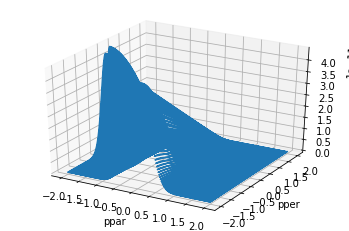

In [25]:
p1 = np.transpose(sym)[0]
p2 = np.transpose(sym)[1]
val = np.transpose(sym)[2]

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(p1,p2,val);
plt.xlabel('ppar');
plt.ylabel('pper');

In [26]:
np.savetxt('HiRes_Frank_orb1_sym.txt', sym)